Veamos un ejemplo que Ger√≥n muestra en su libro. Supongamos que queremos saber si el dinero hace felices a las personas.

Para esto, vamos a descargar los datos del "√çndice para una Vida Mejor" del sitio web de la OCDE y las estad√≠sticas del Banco Mundial sobre el producto interior bruto (PIB) per c√°pita. Luego unimos las tablas y las ordenamos por PIB per c√°pita.

*   **OCDE**: Organizaci√≥n internacional que re√∫ne pa√≠ses para mejorar sus pol√≠ticas econ√≥micas y sociales.
Banco Mundial: Instituci√≥n que financia proyectos y apoya el desarrollo
*   **Banco Mundial**: Instituci√≥n que financia proyectos y apoya el desarrollo econ√≥mico de pa√≠ses.
*   **PIB / PIB per c√°pita**: El PIB mide todo lo que produce un pa√≠s; el PIB per c√°pita muestra cu√°nto produce o gana, en promedio, cada persona.

In [2]:
import urllib.request # urllib es un paquete de python que sirve para "consultar en la web", y request es un m√≥dulo espec√≠fico dentro de esta librer√≠a
from pathlib import Path # pathlib es un m√≥dulo est√°ndar de Python que sirve para trabajar con rutas de archivos y directorios de forma m√°s intuitiva que con cadenas de texto

# Crea un objeto Path que representa la ruta ./datasets/lifesat.
datapath = Path() / "datasets" / "lifesat"

# Crea la carpeta datasets/lifesat.
# parents=True ‚Üí crea todas las carpetas intermedias si no existen.
# exist_ok=True ‚Üí no da error si la carpeta ya existe.
datapath.mkdir(parents=True, exist_ok=True)

# Define la URL base donde est√°n los archivos que queremos descargar.
# En este caso, el fichero est√° en el repositorio de Ger√≥n
data_root = "https://github.com/ageron/data/raw/main/"

# Itera sobre los nombres de los archivos que queremos descargar.
# Vamos a descargar los dos archivos explicados antes
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):

    # Comprueba si el archivo ya existe en nuestra carpeta local. Si existe, no lo descarga otra vez.
    if not (datapath / filename).is_file():

        # Muestra un mensaje indicando qu√© archivo se est√° descargando.
        print("Downloading", filename)

        # Construye la URL completa del archivo a descargar.
        url = data_root + "lifesat/" + filename

        # Descarga el archivo desde la URL y lo guarda en la ruta local especificada.
        urllib.request.urlretrieve(url, datapath / filename)

# Para que este c√≥digo funcione en Google Colab:
# Las rutas de archivos no se crean autom√°ticamente, pero Path funciona igual.
# Los archivos se guardan en la carpeta temporal de Colab (/content/ por defecto).
# No necesitas instalar urllib ni pathlib, son parte de Python est√°ndar.

Ya tenemos los ficheros descargados, ahora podemos leerlos:

In [3]:
# Importamos la librer√≠a pandas, que sirve para trabajar con datos en forma de tablas
import pandas as pd

# Leemos los archivos CSV que descargamos antes (est√°n en la carpeta 'datasets/lifesat')
# Cada archivo se convierte en una "tabla" (DataFrame) dentro de Python
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

# Elegimos el a√±o con el que queremos trabajar
gdp_year = 2020

# Guardamos los nombres de las columnas que queremos usar m√°s adelante
gdppc_col = "GDP per capita (USD)"   # Producto Interno Bruto por persona (en d√≥lares)
lifesat_col = "Life satisfaction"    # Nivel de satisfacci√≥n con la vida

# Filtramos la tabla para quedarnos solo con los datos del a√±o 2020
gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]

# Eliminamos las columnas que no nos interesan ("code" y "year")
# axis=1 indica que estamos borrando columnas (no filas)
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)

# Cambiamos los nombres de las columnas para que sean m√°s claros
gdp_per_capita.columns = ["Country", gdppc_col]

# Hacemos que la columna "Country" (pa√≠s) sea el √≠ndice de la tabla
# As√≠ cada fila estar√° identificada por el nombre del pa√≠s
gdp_per_capita.set_index("Country", inplace=True)

# Mostramos las primeras filas de la tabla para ver c√≥mo qued√≥
gdp_per_capita.head()



GDP per capita (USD)
Country                                          
Afghanistan                           1978.961579
Africa Eastern and Southern           3387.594670
Africa Western and Central            4003.158913
Albania                              13295.410885
Algeria                              10681.679297

Ahora vamos a preprocesar los datos del √çndice para una Vida Mejor (OECD BLI) para quedarnos solo con la columna ‚ÄúSatisfacci√≥n con la vida‚Äù.

In [4]:
# Filtramos las filas del DataFrame para quedarnos solo con los datos
# donde la columna "INEQUALITY" tiene el valor "TOT"
# ("TOT" significa "Total", es decir, sin distinguir por g√©nero, edad u otros factores)
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]

# Reorganizamos la tabla con pivot() para que:
# - Cada pa√≠s quede en una fila (index="Country")
# - Cada tipo de indicador (por ejemplo, "Life satisfaction", "Income", etc.) sea una columna
# - Los valores num√©ricos de esos indicadores est√©n en las celdas (values="Value")
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

# Mostramos las primeras filas del nuevo DataFrame para comprobar el resultado
oecd_bli.head()


Indicator  Air pollution  Dwellings without basic facilities  \
Country                                                        
Australia            5.0                                 NaN   
Austria             16.0                                 0.9   
Belgium             15.0                                 1.9   
Brazil              10.0                                 6.7   
Canada               7.0                                 0.2   

Indicator  Educational attainment  Employees working very long hours  \
Country                                                                
Australia                    81.0                              13.04   
Austria                      85.0                               6.66   
Belgium                      77.0                               4.75   
Brazil                       49.0                               7.13   
Canada                       91.0                               3.69   

Indicator  Employment rate  Feeling safe walking alone at night  \
Country                                                           
Australia             73.0                                 63.5   
Austria               72.0                                 80.6   
Belgium               63.0                                 70.1   
Brazil                61.0                                 35.6   
Canada                73.0                                 82.2   

Indicator  Homicide rate  Household net adjusted disposable income  \
Country                                                              
Australia            1.1                                   32759.0   
Austria              0.5                                   33541.0   
Belgium              1.0                                   30364.0   
Brazil              26.7                                       NaN   
Canada               1.3                                   30854.0   

Indicator  Household net wealth  Housing expenditure  ...  Personal earnings  \
Country                                               ...                      
Australia              427064.0                 20.0  ...            49126.0   
Austria                308325.0                 21.0  ...            50349.0   
Belgium                386006.0                 21.0  ...            49675.0   
Brazil                      NaN                  NaN  ...                NaN   
Canada                 423849.0                 22.0  ...            47622.0   

Indicator  Quality of support network  Rooms per person  Self-reported health  \
Country                                                                         
Australia                        95.0               NaN                  85.0   
Austria                          92.0               1.6                  70.0   
Belgium                          91.0               2.2                  74.0   
Brazil                           90.0               NaN                   NaN   
Canada                           93.0               2.6                  88.0   

Indicator  Stakeholder engagement for developing regulations  Student skills  \
Country                                                                        
Australia                                                2.7           502.0   
Austria                                                  1.3           492.0   
Belgium                                                  2.0           503.0   
Brazil                                                   2.2           395.0   
Canada                                                   2.9           523.0   

Indicator  Time devoted to leisure and personal care  Voter turnout  \
Country                                                               
Australia                                      14.35           91.0   
Austria                                        14.55           80.0   
Belgium                                        15.70           89.0   
Brazil                                  

Ahora combinemos los datos de satisfacci√≥n con la vida y de PIB per c√°pita, qued√°ndonos solo con las columnas PIB per c√°pita y Satisfacci√≥n con la vida.

In [5]:
# Unimos (fusionamos) las dos tablas: oecd_bli y gdp_per_capita
# La uni√≥n se hace usando los √≠ndices (en este caso, el nombre del pa√≠s)
# Esto crea una nueva tabla con las columnas de ambas fuentes de datos
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)

# Ordenamos las filas del DataFrame seg√∫n la columna del PIB per c√°pita
# Esto facilita analizar la relaci√≥n entre el PIB y la satisfacci√≥n con la vida
full_country_stats.sort_values(by=gdppc_col, inplace=True)

# Nos quedamos √∫nicamente con las columnas de inter√©s:
# "PIB per c√°pita" y "Satisfacci√≥n con la vida"
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

# Mostramos las primeras filas del DataFrame resultante
full_country_stats.head()


GDP per capita (USD)  Life satisfaction
Country                                              
South Africa          11466.189672                4.7
Colombia              13441.492952                6.3
Brazil                14063.982505                6.4
Mexico                17887.750736                6.5
Chile                 23324.524751                6.5

Para ilustrar el riesgo de sobreajuste (overfitting), Ger√≥n utiliza solo una parte de los datos (todos los pa√≠ses con un PIB per c√°pita entre min_gdp y max_gdp). M√°s adelante, muestra los pa√≠ses que se hab√≠an omitido y demuestra que no siguen en absoluto la misma tendencia lineal.

Ger√≥n emplea este ejemplo para mostrar c√≥mo un modelo puede parecer muy preciso si se analiza solo con una parte limitada de los datos (por ejemplo, pa√≠ses con PIB medio). Sin embargo, cuando se incorporan los pa√≠ses que quedaron fuera (con PIB muy alto o muy bajo), la relaci√≥n deja de ser lineal, evidenciando el problema del sobreajuste, que ocurre cuando un modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien a nuevos casos.

In [6]:
# Definimos los l√≠mites inferior y superior del PIB per c√°pita
# Solo queremos analizar los pa√≠ses cuyo PIB per c√°pita est√© dentro de este rango
min_gdp = 23_500
max_gdp = 62_500

# Filtramos la tabla para quedarnos √∫nicamente con los pa√≠ses
# que tienen un PIB per c√°pita entre min_gdp y max_gdp (inclusive)
# La condici√≥n usa el operador "&" (AND) para combinar ambos filtros
country_stats = full_country_stats[
    (full_country_stats[gdppc_col] >= min_gdp) &
    (full_country_stats[gdppc_col] <= max_gdp)
]

# Mostramos las primeras filas del nuevo DataFrame con los pa√≠ses seleccionados
country_stats.head()


GDP per capita (USD)  Life satisfaction
Country                                         
Russia           26456.387938                5.8
Greece           27287.083401                5.4
Turkey           28384.987785                5.5
Latvia           29932.493910                5.9
Hungary          31007.768407                5.6

En este punto ser√≠a recomendable guardar los resultados ya que nos ha costado algo de trabajo llegar a esta tabla.

In [7]:
# Guardamos el DataFrame 'country_stats' en un archivo CSV llamado 'lifesat.csv'
# Este archivo contiene solo los pa√≠ses dentro del rango de PIB per c√°pita definido (min_gdp a max_gdp)
country_stats.to_csv(datapath / "lifesat.csv")

# Guardamos el DataFrame completo 'full_country_stats' en otro archivo CSV llamado 'lifesat_full.csv'
# Este archivo incluye todos los pa√≠ses, sin aplicar ning√∫n filtro
full_country_stats.to_csv(datapath / "lifesat_full.csv")


Antes de continuar, vamos a crear una peque√±a funci√≥n axiliar. El prop√≥sito de esta funci√≥n auxiliar es facilitar la organizaci√≥n y el guardado de figuras generadas con matplotlib.

In [8]:
# Importamos la clase Path del m√≥dulo pathlib para trabajar con rutas de archivos de forma segura
from pathlib import Path

# Definimos la carpeta donde se guardar√°n las figuras generadas
# Se crea la ruta "./images/fundamentals"
IMAGES_PATH = Path() / "images" / "fundamentals"

# Creamos la carpeta (y todas las carpetas intermedias si no existen)
# parents=True permite crear carpetas intermedias
# exist_ok=True evita errores si la carpeta ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Definimos una funci√≥n para guardar figuras de matplotlib de forma consistente
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Construimos la ruta completa del archivo donde se guardar√° la figura
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"

    # Ajustamos autom√°ticamente los m√°rgenes de la figura si tight_layout=True
    if tight_layout:
        plt.tight_layout()

    # Guardamos la figura en el archivo especificado
    # fig_extension define el formato (png, pdf, etc.)
    # resolution define los puntos por pulgada (dpi) de la imagen
    plt.savefig(path, format=fig_extension, dpi=resolution)


El siguiente c√≥digo lo utiliza Ger√≥n para visualizar la relaci√≥n entre el PIB per c√°pita y la satisfacci√≥n con la vida en diferentes pa√≠ses.
Su objetivo es:

1.   Explorar visualmente los datos y comprobar si existe una tendencia (por
ejemplo, que los pa√≠ses m√°s ricos tienden a tener mayor satisfacci√≥n).
2.   Destacar algunos casos concretos (como Turqu√≠a, Dinamarca o EE. UU.) para mostrar que, aunque hay una tendencia general, no todos los pa√≠ses siguen exactamente la misma relaci√≥n lineal.
3. Preparar el terreno para introducir el concepto de modelos predictivos y sobreajuste: c√≥mo los modelos pueden captar una tendencia aparente en una parte de los datos, pero fallar cuando se observan todos los casos.

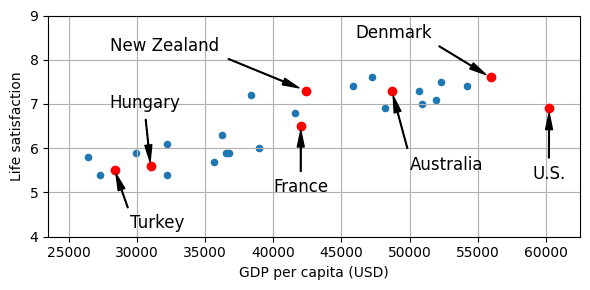

In [9]:
import matplotlib.pyplot as plt

# Creamos un gr√°fico de dispersi√≥n (scatter plot) para visualizar los datos
# En el eje X se representa el PIB per c√°pita (gdppc_col)
# En el eje Y se representa la satisfacci√≥n con la vida (lifesat_col)
# figsize define el tama√±o del gr√°fico, y grid=True activa la cuadr√≠cula.
# Puedes jugar con estos valores para ver c√≥mo afectan a la presentaci√≥n del gr√°fico
country_stats.plot(kind='scatter', figsize=(6, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

# Definimos los valores m√≠nimo y m√°ximo de satisfacci√≥n con la vida
# para ajustar los l√≠mites del eje Y en el gr√°fico.
# Puedes probar tambi√©n a cambiarlos para jugar con Matplotlib
min_life_sat = 4
max_life_sat = 9

# Creamos un diccionario con algunos pa√≠ses seleccionados y las coordenadas
# donde se colocar√° la etiqueta (texto) de cada uno dentro del gr√°fico
position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

# Recorremos cada pa√≠s del diccionario para a√±adir su nombre al gr√°fico
for country, pos_text in position_text.items():
    # Obtenemos las coordenadas reales del pa√≠s (sus valores en los datos)
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]

    # Ajuste est√©tico: cambiamos el nombre "United States" por "U.S." en la etiqueta
    # Ger√≥n dej√≥ aqu√≠ esta l√≠nea, pero no es muy eficiente. Te reto a que
    # me digas por qu√©.
    country = "U.S." if country == "United States" else country

    # A√±adimos una etiqueta con el nombre del pa√≠s y una flecha que apunta al punto correspondiente
    plt.annotate(
        country,                      # El texto que queremos mostrar (nombre del pa√≠s)
        xy=(pos_data_x, pos_data_y),  # Coordenadas del punto real en el gr√°fico (donde se encuentra el pa√≠s)
        xytext=pos_text,              # Coordenadas donde se colocar√° la etiqueta (para no tapar el punto)
        fontsize=12,                  # Tama√±o del texto de la etiqueta
        arrowprops=dict(               # Propiedades de la flecha que conecta la etiqueta con el punto
            facecolor='black',        # Color de la flecha
            width=0.5,                # Grosor de la l√≠nea de la flecha
            shrink=0.08,              # Acorta la flecha para que no toque directamente el marcador
            headwidth=5               # Ancho de la cabeza de la flecha
        )
    )


    # Marcamos el punto del pa√≠s con un peque√±o c√≠rculo rojo
    plt.plot(pos_data_x, pos_data_y, "ro")

# Ajustamos los l√≠mites de los ejes X e Y para encuadrar bien el gr√°fico
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Guardamos la figura con un nombre de archivo
save_fig('money_happy_scatterplot')

# Mostramos el gr√°fico final en pantalla
plt.show()


En su libro, Ger√≥n indica que parece que hay una tendencia aqu√≠. Aunque los datos son ruidosos (es decir, parcialmente aleatorios), parece que la satisfacci√≥n con la vida aumenta m√°s o menos de manera lineal a medida que crece el PIB per c√°pita de un pa√≠s. Por lo tanto, se imagina que querriamos modelar la satisfacci√≥n con la vida como una funci√≥n lineal del PIB per c√°pita. Este paso se llama, comenta en su libro, selecci√≥n de modelo: hemos seleccionado un modelo lineal de satisfacci√≥n con la vida con un solo atributo, el PIB per c√°pita.

El siguiente c√≥digo selecciona un subconjunto de pa√≠ses espec√≠ficos (los que se hab√≠an destacado con etiquetas en el gr√°fico) y muestra sus valores de PIB per c√°pita y satisfacci√≥n con la vida, ordenados por PIB.
Es √∫til para ver de manera clara los datos de los pa√≠ses destacados y compararlos entre s√≠.

In [10]:
# Seleccionamos √∫nicamente los pa√≠ses que queremos resaltar en el gr√°fico
# `position_text.keys()` contiene los nombres de los pa√≠ses que hemos etiquetado
# `loc` permite acceder a las filas de un DataFrame usando los nombres del √≠ndice (pa√≠ses)
highlighted_countries = country_stats.loc[list(position_text.keys())]

# Mostramos solo las columnas de inter√©s: PIB per c√°pita y Satisfacci√≥n con la vida
# Adem√°s, ordenamos los pa√≠ses por el PIB per c√°pita para comparar m√°s f√°cilmente
# Si en sort_values() no indicamos nada m√°s, , ascending=True por defecto, es decir,
# La columna por la que se ordena lo har√° de menor a mayor.
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)


GDP per capita (USD)  Life satisfaction
Country                                               
Turkey                 28384.987785                5.5
Hungary                31007.768407                5.6
France                 42025.617373                6.5
New Zealand            42404.393738                7.3
Australia              48697.837028                7.3
Denmark                55938.212809                7.6
United States          60235.728492                6.9

El siguiente c√≥digo crea un gr√°fico que muestra c√≥mo se relacionan dos variables:

1.   El PIB per c√°pita de un pa√≠s (es decir, cu√°nto dinero produce por persona)
2.   Su nivel de satisfacci√≥n con la vida.

Primero, Ger√≥n dibuja los puntos correspondientes a cada pa√≠s.
Luego, a√±ade tres l√≠neas rectas que representan tres modelos diferentes.
Cada una tiene valores distintos del t√©rmino independiente (w1) y pendiente (w2), que determinan d√≥nde empieza la l√≠nea y cu√°nto se inclina.

Al mostrar las tres l√≠neas a la vez, el c√≥digo permite comparar c√≥mo cambia la predicci√≥n cuando modificamos estos par√°metros. As√≠ podemos ver qu√© combinaciones se acercan mejor a los datos reales.

Finalmente, guarda el gr√°fico como imagen y lo muestra en pantalla.

Con este ejemplo, Ger√≥n quiere mostrar de forma visual e intuitiva c√≥mo funcionan los par√°metros de un modelo lineal.



*   El par√°metro Œ∏‚ÇÄ (t√©rmino independiente) mueve la l√≠nea hacia arriba o hacia abajo.
*   El par√°metro Œ∏‚ÇÅ (pendiente) controla la inclinaci√≥n: si la l√≠nea sube o baja con el PIB.

Al variar estos valores, podemos ver c√≥mo la l√≠nea se ajusta mejor o peor a los puntos de los pa√≠ses.

Este ejercicio sirve como introducci√≥n a la regresi√≥n lineal, una t√©cnica que busca la mejor l√≠nea posible para representar la relaci√≥n entre dos variables.

En resumen, Ger√≥n utiliza este gr√°fico para que entendamos c√≥mo los par√°metros dan forma al modelo y por qu√© elegir los valores adecuados es clave para hacer buenas predicciones.

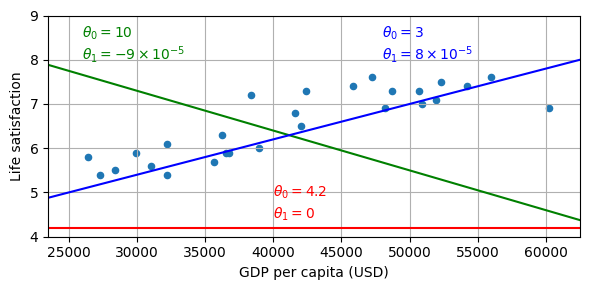

In [11]:
import numpy as np

# Creamos un gr√°fico de dispersi√≥n (scatter plot) con los datos de los pa√≠ses
# Eje X: PIB per c√°pita, Eje Y: Satisfacci√≥n con la vida
# figsize define el tama√±o del gr√°fico y grid=True a√±ade la cuadr√≠cula
country_stats.plot(kind='scatter', figsize=(6, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

# Creamos un array de valores de PIB per c√°pita uniformemente distribuidos
# Esto se usar√° para dibujar las l√≠neas de los modelos lineales
X = np.linspace(min_gdp, max_gdp, 1000)

# -------- Primer modelo --------
w1, w2 = 4.2, 0  # Definimos los par√°metros del modelo lineal (t√©rmino independiente y pendiente)
plt.plot(X, w1 + w2 * 1e-5 * X, "r")  # Dibujamos la l√≠nea roja correspondiente al modelo
# A√±adimos etiquetas de los par√°metros del modelo en el gr√°fico
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")  # T√©rmino independiente
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")   # Pendiente

# -------- Segundo modelo --------
w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")  # L√≠nea verde
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

# -------- Tercer modelo --------
w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")  # L√≠nea azul
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

# Ajustamos los l√≠mites de los ejes para que se vea todo el rango de datos
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Guardamos la figura con el nombre 'tweaking_model_params_plot'
save_fig('tweaking_model_params_plot')

# Mostramos el gr√°fico final en pantalla
plt.show()


Aqu√≠ es donde entra en juego el **algoritmo de regresi√≥n lineal**: se le proporcionan los ejemplos de entrenamiento (en este caso, los datos de los pa√≠ses con su PIB per c√°pita y su nivel de satisfacci√≥n con la vida), y el algoritmo **encuentra los par√°metros** que hacen que el modelo lineal se ajuste **lo mejor posible a los datos**.


In [12]:
# Importamos el m√≥dulo de regresi√≥n lineal de scikit-learn
# Este m√≥dulo nos permite crear modelos de regresi√≥n lineal f√°cilmente
from sklearn import linear_model

# Creamos las variables de entrada (X) y salida (y) para el modelo
# X_sample: matriz con los valores de PIB per c√°pita de los pa√≠ses
# y_sample: matriz con los valores de satisfacci√≥n con la vida de los pa√≠ses
# [[ ]] se usa para asegurarnos de que sean matrices 2D, como requiere sklearn
X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

# Creamos un objeto de regresi√≥n lineal
# Este objeto representa un modelo lineal que aprender√° la relaci√≥n entre X e y
lin1 = linear_model.LinearRegression()

# Entrenamos (ajustamos) el modelo usando los datos de entrada y salida
# El m√©todo fit encuentra los par√°metros √≥ptimos Œ∏0 (intercepto) y Œ∏1 (pendiente)
lin1.fit(X_sample, y_sample)

# Extraemos los par√°metros aprendidos por el modelo
# lin1.intercept_ ‚Üí el intercepto Œ∏0
# lin1.coef_ ‚Üí la pendiente Œ∏1 (coef_ es un array, usamos ravel() para convertirlo a 1D)
t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]

# Mostramos los valores aprendidos de los par√°metros en la consola
# {:.2f} ‚Üí formato con 2 decimales para el intercepto
# {:.2e} ‚Üí formato en notaci√≥n cient√≠fica para la pendiente
print(f"Œ∏0={t0:.2f}, Œ∏1={t1:.2e}")


Œ∏0=3.75, Œ∏1=6.78e-05



A este proceso se le llama **entrenar el modelo**.
En este ejemplo, el algoritmo determina que los valores √≥ptimos de los par√°metros son:

[Œ∏0=3.75, Œ∏1=6.78e-05]


‚ö†Ô∏è **Advertencia sobre el t√©rmino ‚Äúmodelo‚Äù**
El t√©rmino *modelo* puede referirse a distintas cosas:

* A un **tipo de modelo**, como la regresi√≥n lineal.
* A una **arquitectura espec√≠fica**, por ejemplo, una regresi√≥n lineal con una variable de entrada (PIB per c√°pita) y una de salida (satisfacci√≥n con la vida).
* O al **modelo ya entrenado**, listo para hacer predicciones, que en este caso ser√≠a una regresi√≥n lineal con los par√°metros aprendidos:
  [Œ∏0=3.75, Œ∏1=6.78e-05]

La **selecci√≥n del modelo** consiste en escoger qu√© tipo de modelo se va a usar y definir su estructura.
El **entrenamiento del modelo** consiste en ejecutar un algoritmo que encuentre los valores de los par√°metros que mejor se ajusten a los datos de entrenamiento, de forma que el modelo pueda luego hacer **buenas predicciones con nuevos datos**.

Una vez entrenado, el modelo se ajusta a los datos de entrenamiento **todo lo posible** (para un modelo lineal).

Ahora el modelo est√° listo para hacer **predicciones**.


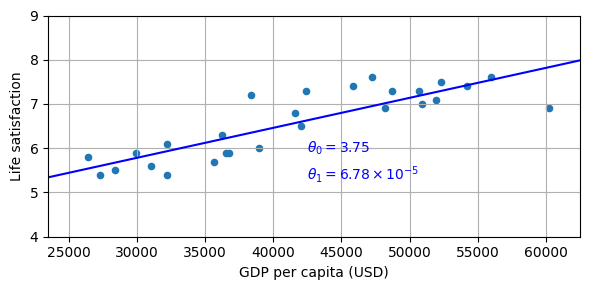

In [13]:
# Creamos un gr√°fico de dispersi√≥n de los pa√≠ses
# kind='scatter' ‚Üí gr√°fico de puntos
# figsize=(5,3) ‚Üí tama√±o del gr√°fico
# grid=True ‚Üí a√±ade cuadr√≠cula
# x=gdppc_col ‚Üí eje X: PIB per c√°pita
# y=lifesat_col ‚Üí eje Y: Satisfacci√≥n con la vida
country_stats.plot(kind='scatter', figsize=(6, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

# Generamos un array de 1000 puntos uniformemente distribuidos entre min_gdp y max_gdp
# Esto servir√° para dibujar la l√≠nea de regresi√≥n
X = np.linspace(min_gdp, max_gdp, 1000)

# Dibujamos la l√≠nea de regresi√≥n lineal ajustada con los par√°metros aprendidos t0 y t1
# "b" ‚Üí color azul
plt.plot(X, t0 + t1 * X, "b")

# A√±adimos el texto del intercepto Œ∏0 en el gr√°fico
# Se coloca cerca del borde inferior derecho para no tapar los puntos
plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")

# A√±adimos el texto de la pendiente Œ∏1 en el gr√°fico
# Multiplicamos t1 por 1e5 para mostrarlo de manera m√°s legible en notaci√≥n cient√≠fica
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

# Ajustamos los l√≠mites de los ejes X y Y para que se vea todo el rango de datos y la l√≠nea
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Guardamos la figura con el nombre 'best_fit_model_plot'
save_fig('best_fit_model_plot')

# Mostramos el gr√°fico final en pantalla
plt.show()


Ya estamos listo para usar el modelo para hacer predicciones. Por ejemplo, supongamos que queremos saber cu√°l es el nivel de felicidad de los chipriotas (Ger√≥n usa este ejemplo en su libro), pero los datos de la OCDE no incluyen esa informaci√≥n. Por suerte, podemos utilizar el modelo para hacer una buena estimaci√≥n: buscamos el PIB per c√°pita de Chipre, que es de 37.655 d√≥lares, y luego aplicamos el modelo para predecir el nivel de satisfacci√≥n con la vida.

In [14]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

np.float64(37655.1803457421)

In [15]:
# Usamos el modelo entrenado (lin1) para hacer una predicci√≥n
# lin1.predict() espera una matriz (2D), por eso se ponen los dobles corchetes [[...]]
# En este caso, le damos el PIB per c√°pita de Chipre como entrada
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]

# Mostramos en pantalla el valor predicho de satisfacci√≥n con la vida para Chipre
cyprus_predicted_life_satisfaction


np.float64(6.301656332738056)

Aqu√≠ hemos usado el modelo de regresi√≥n lineal entrenado (lin1) para hacer una predicci√≥n.

Le pasamos como entrada al modelo el PIB per c√°pita de Chipre (cyprus_gdp_per_capita).

El m√©todo .predict() devuelve una matriz 2D con el resultado (porque as√≠ trabaja scikit-learn). Por eso se accede al primer elemento con [0, 0] para obtener solo el n√∫mero.

Si est√°s interesado en m√°s informaci√≥n sobre el modelo de regresi√≥n lineal de scikit-learn, aqu√≠ te dejo el enlace a la documentaci√≥n oficial: https://scikit-learn.org/stable/modules/linear_model.html

Vamos a mostrar visualmente la predicci√≥n del modelo lineal para Chipre dentro del contexto de todos los pa√≠ses. Para esto, Ger√≥n dibuja los datos reales (puntos de pa√≠ses) en un gr√°fico de dispersi√≥n y traza la l√≠nea azul del modelo lineal ajustado (la relaci√≥n aprendida entre PIB per c√°pita y satisfacci√≥n).

Para remarcar la predicci√≥n hecha para Chipre, marca su posici√≥n, y dibuja una l√≠nea roja discontinua que sube desde su PIB hasta la predicci√≥n del modelo.

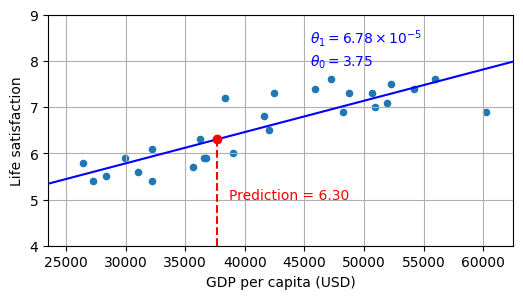

In [16]:
# Creamos un gr√°fico de dispersi√≥n con los datos reales
# Cada punto representa un pa√≠s, mostrando la relaci√≥n entre
# PIB per c√°pita (eje X) y satisfacci√≥n con la vida (eje Y)
country_stats.plot(kind='scatter', figsize=(6, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

# Generamos un rango de valores de PIB entre el m√≠nimo y el m√°ximo
# Esto servir√° para dibujar la l√≠nea de regresi√≥n
X = np.linspace(min_gdp, max_gdp, 1000)

# Dibujamos la l√≠nea azul del modelo lineal entrenado (la "mejor l√≠nea de ajuste")
# t0 = intercepto, t1 = pendiente
# Estos valores ya se calcularon cuando se entren√≥ el modelo
plt.plot(X, t0 + t1 * X, "b")

# Mostramos en el gr√°fico los valores de los par√°metros del modelo (Œ∏0 y Œ∏1)
# Se colocan cerca de la parte superior derecha para que sean visibles
plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

# Dibujamos una l√≠nea discontinua roja (r--) que marca visualmente la predicci√≥n de Chipre
# Va desde el eje X (PIB de Chipre) hasta la predicci√≥n en el eje Y
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")

# A√±adimos una etiqueta de texto junto a la l√≠nea roja
# Muestra el valor predicho de satisfacci√≥n con la vida para Chipre
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")

# Dibujamos un punto rojo en la posici√≥n exacta de la predicci√≥n
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

# Ajustamos los l√≠mites de los ejes X e Y
# Esto asegura que se vea todo el rango de datos, la l√≠nea de regresi√≥n y la predicci√≥n
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Mostramos el gr√°fico completo en pantalla
plt.show()


Para poder generalizar bien, es fundamental que los datos de entrenamiento sean representativos de los nuevos casos sobre los que queremos generalizar. Esto es cierto tanto si usamos aprendizaje basado en instancias como si usamos aprendizaje basado en modelos.

Por ejemplo, el conjunto de pa√≠ses que se utilizamos antes para entrenar el modelo lineal no era perfectamente representativo: no inclu√≠a ning√∫n pa√≠s con un PIB per c√°pita inferior a 23.500$ ni superior a 62.500$.

Vamos a generar ahora una figura, como hace Ger√≥n en su libro, que muestra c√≥mo se ven los datos cuando se a√±aden pa√≠ses en esos rangos.

In [17]:
# Filtramos los pa√≠ses que est√°n fuera del rango de PIB per c√°pita usado antes (min_gdp y max_gdp)
# Es decir, seleccionamos los pa√≠ses "faltantes" (muy pobres o muy ricos)
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data  # Mostramos los datos de estos pa√≠ses faltantes


GDP per capita (USD)  Life satisfaction
Country                                              
South Africa          11466.189672                4.7
Colombia              13441.492952                6.3
Brazil                14063.982505                6.4
Mexico                17887.750736                6.5
Chile                 23324.524751                6.5
Norway                63585.903514                7.6
Switzerland           68393.306004                7.5
Ireland               89688.956958                7.0
Luxembourg           110261.157353                6.9

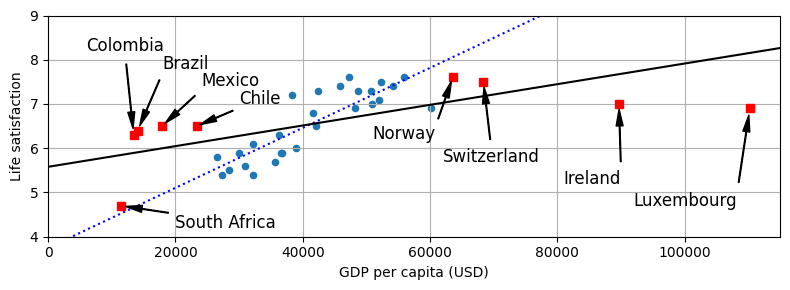

In [18]:
# Diccionario con los pa√≠ses faltantes y las coordenadas donde se colocar√°n sus etiquetas en el gr√°fico
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}


# Dibujamos un gr√°fico de dispersi√≥n (PIB per c√°pita vs. satisfacci√≥n con la vida)
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)


# Recorremos los pa√≠ses faltantes y los a√±adimos al gr√°fico con una etiqueta y una flecha
for country, pos_text in position_text_missing_countries.items():
    # Obtenemos los valores reales de PIB y satisfacci√≥n para ese pa√≠s
    pos_data_x, pos_data_y = missing_data.loc[country]

    # Dibujamos el nombre del pa√≠s con una flecha que apunta a su punto
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    # Marcamos el punto del pa√≠s en rojo (s√≠mbolo 'rs' = red square)
    plt.plot(pos_data_x, pos_data_y, "rs")


# Creamos un rango de valores de PIB para dibujar las l√≠neas del modelo
X = np.linspace(0, 115_000, 1000)

# Dibujamos la l√≠nea discontinua azul: es el modelo lineal original (entrenado con menos datos)
plt.plot(X, t0 + t1 * X, "b:")


# Entrenamos un nuevo modelo lineal pero ahora con *todos* los pa√≠ses (m√°s representativo)
lin_reg_full = linear_model.LinearRegression()

# Preparamos los datos completos (todas las filas y columnas necesarias)
Xfull = np.c_[full_country_stats[gdppc_col]]      # PIB per c√°pita
yfull = np.c_[full_country_stats[lifesat_col]]    # Satisfacci√≥n con la vida

# Ajustamos el modelo a todos los datos
lin_reg_full.fit(Xfull, yfull)

# Obtenemos los nuevos par√°metros del modelo (intercepto y pendiente)
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]

# Dibujamos la nueva l√≠nea de regresi√≥n (en negro)
plt.plot(X, t0full + t1full * X, "k")


# Ajustamos los l√≠mites del gr√°fico
plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Guardamos la figura y la mostramos
save_fig('representative_training_data_scatterplot')
plt.show()

Si entrenamos un modelo lineal con este nuevo conjunto de datos, obtenemos la l√≠nea continua, mientras que el modelo anterior se representa con la l√≠nea discontinua.

Como puede verse, a√±adir solo unos pocos pa√≠ses faltantes altera significativamente el modelo y deja claro que un modelo lineal tan simple probablemente no funcionar√° bien. Parece que los pa√≠ses muy ricos no son m√°s felices que los moderadamente ricos (de hecho, parecen un poco menos felices), y, por el contrario, algunos pa√≠ses pobres parecen m√°s felices que muchos ricos.

Al usar un conjunto de entrenamiento no representativo, se entren√≥ un modelo que probablemente no har√° predicciones precisas, especialmente para los pa√≠ses muy pobres o muy ricos.

Es fundamental usar un conjunto de entrenamiento representativo de los casos que se quieren generalizar. Sin embargo, esto suele ser m√°s dif√≠cil de lo que parece: si la muestra es demasiado peque√±a, aparecer√° ruido de muestreo (es decir, datos no representativos por azar), pero incluso muestras muy grandes pueden ser no representativas si el m√©todo de muestreo es incorrecto.
A esto se le llama sesgo de muestreo (sampling bias).

Tambi√©n puede ocurrir lo contrario: cuando un modelo se ajusta demasiado a los datos de entrenamiento, pero no funciona bien con nuevos datos, decimos que hay sobreajuste (overfitting).

Ger√≥n explica que un modelo muy complejo ‚Äîcomo uno polin√≥mico de alto grado o una red neuronal profunda‚Äî puede detectar patrones muy sutiles, incluso aquellos que son simplemente ruido o coincidencias en los datos. Por ejemplo, un modelo podr√≠a detectar que los pa√≠ses con una ‚Äúw‚Äù en su nombre tienen una satisfacci√≥n alta, algo claramente casual.

En esos casos, el modelo parece funcionar muy bien con los datos de entrenamiento, pero falla al generalizar a nuevas situaciones.

Por resumir: el overfitting ocurre cuando un modelo aprende demasiado bien los detalles del conjunto de entrenamiento ‚Äîincluyendo el ruido o coincidencias irrelevantes‚Äî, lo que hace que pierda capacidad para predecir correctamente en nuevos casos. Veamos el ejemplo que propone Ger√≥n:

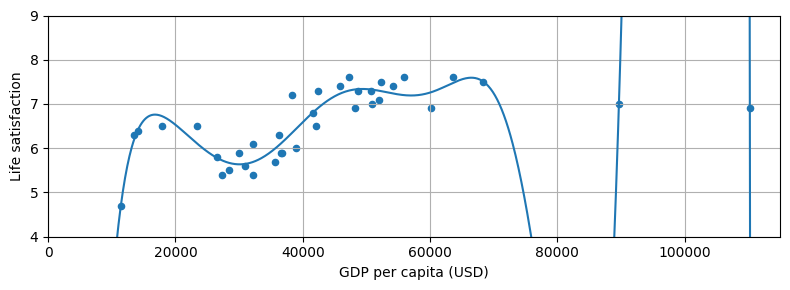

In [19]:
from sklearn import preprocessing
from sklearn import pipeline

# Dibuja los datos originales: cada punto representa un pa√≠s
# Eje X: PIB per c√°pita (GDP per capita)
# Eje Y: Satisfacci√≥n con la vida (Life Satisfaction)
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

# Crea una transformaci√≥n polin√≥mica de grado 10.
# Esto genera nuevas caracter√≠sticas (x, x¬≤, x¬≥, ..., x¬π‚Å∞) a partir del PIB per c√°pita.
# Permite que el modelo capture relaciones no lineales entre PIB y satisfacci√≥n.
poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)

# Escala los datos para que todas las caracter√≠sticas (x, x¬≤, x¬≥...) est√©n en la misma escala.
# Esto mejora la estabilidad num√©rica y el rendimiento del modelo.
scaler = preprocessing.StandardScaler()

# Crea un modelo de regresi√≥n lineal.
# Aunque el modelo es lineal respecto a las caracter√≠sticas polin√≥micas, el resultado ser√° una curva no lineal.
lin_reg2 = linear_model.LinearRegression()

# Crea una "pipeline" que encadena las tres etapas:
# 1. Generar caracter√≠sticas polin√≥micas.
# 2. Escalar los datos.
# 3. Ajustar la regresi√≥n lineal.
pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)
])

# Entrena el modelo usando todos los datos disponibles.
pipeline_reg.fit(Xfull, yfull)

# Predice los valores de satisfacci√≥n para muchos valores de PIB (X).
# np.newaxis convierte X en una matriz columna (forma correcta para sklearn).
curve = pipeline_reg.predict(X[:, np.newaxis])

# Dibuja la curva ajustada por el modelo sobre el gr√°fico de dispersi√≥n.
plt.plot(X, curve)

# Define los l√≠mites de los ejes.
plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Guarda la figura con un nombre descriptivo.
save_fig('overfitting_model_plot')

# Muestra el gr√°fico final.
plt.show()


El c√≥digo anterior crea y entrena un modelo polin√≥mico de grado 10 para predecir la satisfacci√≥n con la vida a partir del PIB per c√°pita, usando una pipeline que automatiza las etapas de:

1. Generar caracter√≠sticas polin√≥micas.
2. Escalar los datos.
3. Ajustar una regresi√≥n lineal.

Finalmente, el c√≥digo dibuja la curva resultante sobre el gr√°fico de dispersi√≥n de los pa√≠ses para mostrar c√≥mo el modelo se ajusta (o sobreajusta) a los datos.

el modelo lineal que definimos antes tiene dos par√°metros, Œ∏‚ÇÄ y Œ∏‚ÇÅ. Esto da al algoritmo de aprendizaje **dos grados de libertad** para adaptarse a los datos de entrenamiento: puede ajustar tanto la **altura** (Œ∏‚ÇÄ, el intercepto) como la **pendiente** (Œ∏‚ÇÅ).

Si obligamos a que Œ∏‚ÇÅ = 0, el algoritmo solo podr√≠a mover la l√≠nea hacia arriba o hacia abajo, pero no cambiar su inclinaci√≥n, as√≠ que la l√≠nea se ajustar√≠a m√°s o menos al promedio: ser√≠a un modelo muy simple.

Por otro lado, si permitimos modificar Œ∏‚ÇÅ pero le forzamos a mantenerlo **peque√±o**, el algoritmo tendr√° una flexibilidad intermedia: ni tan r√≠gido como el caso anterior, ni tan libre como sin restricci√≥n.

Restringir un modelo para hacerlo m√°s simple y reducir el riesgo de sobreajuste se llama **regularizaci√≥n**.

El objetivo es **encontrar el equilibrio adecuado** entre:

* Ajustar bien los datos de entrenamiento, y
* Mantener el modelo lo suficientemente simple como para generalizar bien a nuevos datos.

Piensa en la **regularizaci√≥n** como una forma de ‚Äúponerle l√≠mites‚Äù al modelo para que no se complique demasiado.

üëâ Si un modelo tiene demasiada libertad, puede **memorizar** los datos de entrenamiento, incluso los errores o el ruido (eso es **overfitting**).

üëâ Si lo restringes demasiado, no aprender√° lo suficiente (eso ser√≠a **underfitting**).

La regularizaci√≥n es como decirle:

> ‚ÄúAjusta la l√≠nea a los datos, pero no te obsesiones con seguir cada punto al mil√≠metro.‚Äù

Este equilibrio entre **precisi√≥n y simplicidad** es lo que permite construir modelos que realmente funcionan en el mundo real.

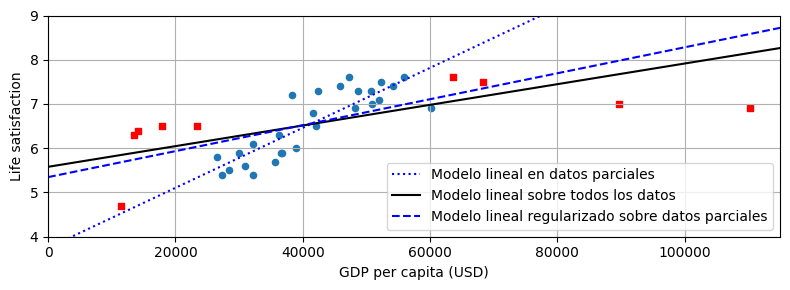

In [21]:
# Dibuja los pa√≠ses usados para entrenar el modelo inicial (datos parciales)
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))

# Dibuja los pa√≠ses "faltantes" (datos que no se usaron en el primer modelo) en rojo con forma de cuadrado
# Usa el mismo eje del gr√°fico anterior (ax=plt.gca()) para superponerlos
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

# Crea una secuencia de valores de PIB per c√°pita (de 0 a 115,000) para dibujar las l√≠neas de regresi√≥n
X = np.linspace(0, 115_000, 1000)

# Dibuja la l√≠nea azul punteada (:) del modelo entrenado con los datos parciales
plt.plot(X, t0 + t1*X, "b:", label="Modelo lineal en datos parciales")

# Dibuja la l√≠nea negra s√≥lida del modelo entrenado con todos los pa√≠ses (datos completos)
plt.plot(X, t0full + t1full * X, "k-", label="Modelo lineal sobre todos los datos")

# Crea un modelo lineal regularizado (Ridge Regression)
# alpha controla el grado de regularizaci√≥n (muy alto = m√°s restricci√≥n = l√≠nea m√°s plana)
ridge = linear_model.Ridge(alpha=10**9.5)

# Extrae las columnas de entrada (PIB) y salida (satisfacci√≥n)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]

# Entrena el modelo Ridge usando solo los datos parciales
ridge.fit(X_sample, y_sample)

# Obtiene los par√°metros del modelo entrenado: intercepto (t0ridge) y pendiente (t1ridge)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]

# Dibuja la l√≠nea azul discontinua (--), correspondiente al modelo regularizado
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Modelo lineal regularizado sobre datos parciales")

# A√±ade una leyenda en la parte inferior derecha
plt.legend(loc="lower right")

# Define los l√≠mites de los ejes (PIB per c√°pita y satisfacci√≥n)
plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Guarda la figura como archivo
save_fig('ridge_model_plot')

# Muestra el gr√°fico final
plt.show()